# Project 3: Diabetes Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv('diabetes.csv')

# Phase 1: Data Exploration

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- > here we see that there are 768 rows and 9 columns
- > and the data type of each column is ok

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- > here we see that there are no missing values

In [7]:
df.duplicated().sum()

0

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- > here we see that there are 500 non-diabetic patients and 268 diabetic patients

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


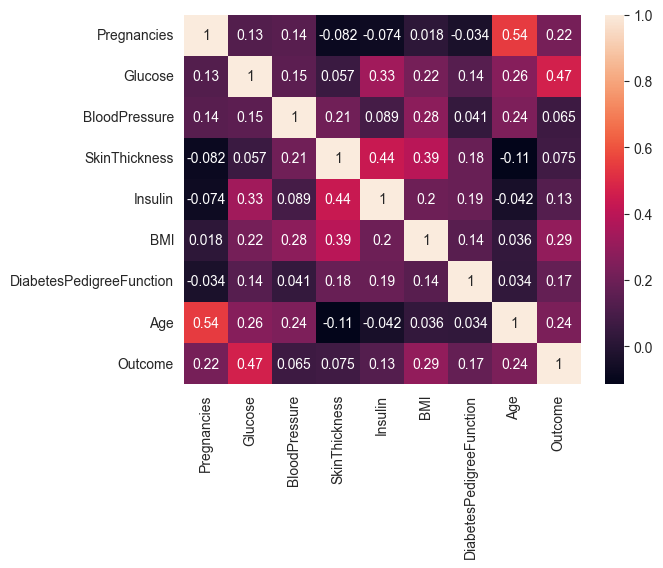

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

- > the relation between gluose and outcome is ".5"

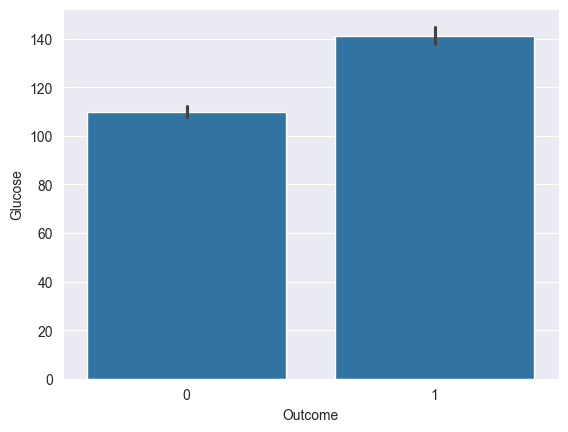

In [15]:
sns.barplot(data=df, y="Glucose", x="Outcome")
plt.show()

In [16]:
df["BMI"].corr(df["Outcome"])

0.2926946626444453

- > the relation between BMI and outcome is ".3"

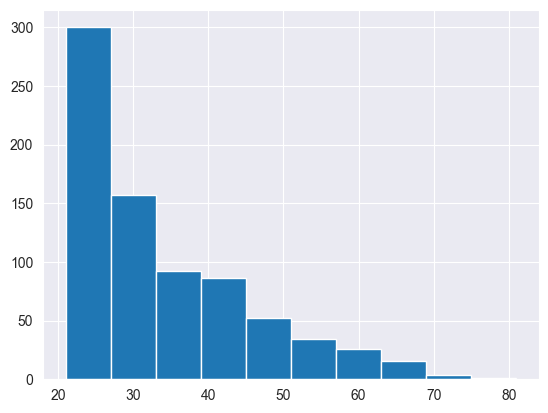

In [21]:
df["Age"].hist()
plt.show()

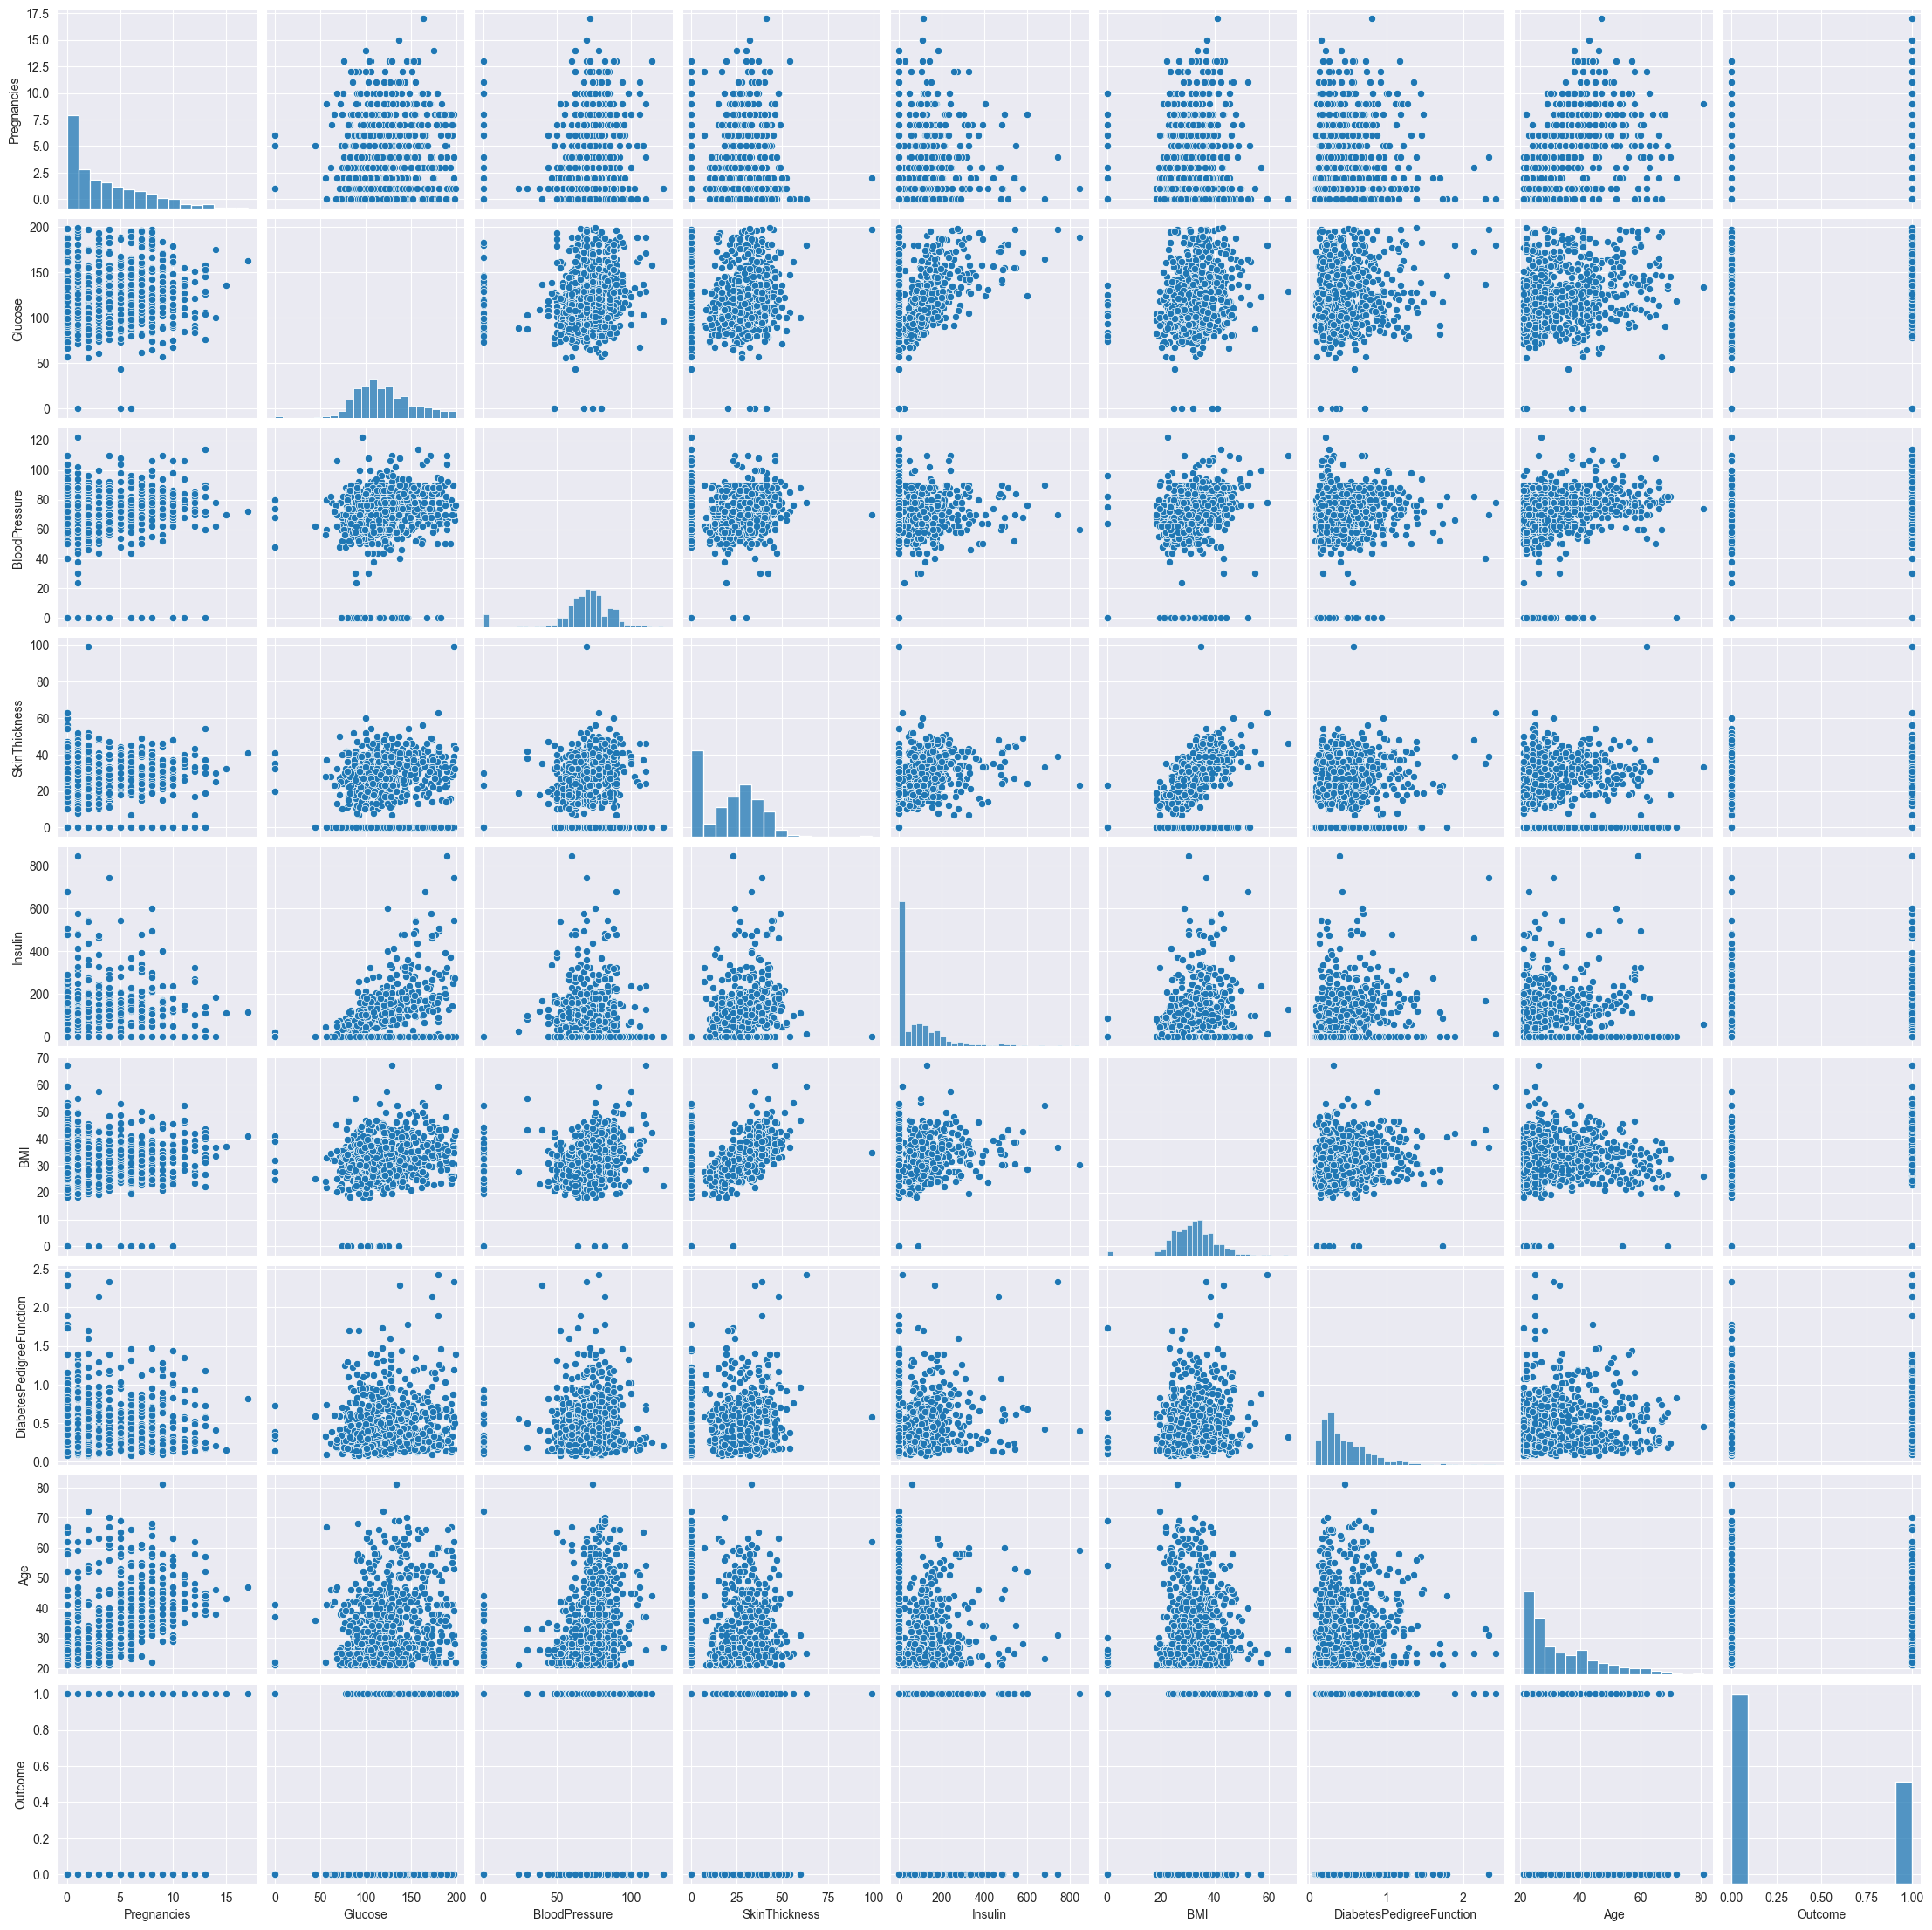

In [22]:
sns.pairplot(df)

# Phase 2: Data Preprocessing

## Why use standardization?

### To make all the features have the same scale so that the model can learn from all the features equally no one feature is more important than the other or dominant other features

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Phase 3: Model Training

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
acc_log = accuracy_score(y_pred,y_test)
acc_log

0.7532467532467533

### SVM

In [32]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [33]:
y_pred = svc.predict(X_test)

In [35]:
acc_svc = accuracy_score(y_pred,y_test)
acc_svc

0.7272727272727273

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_pred = rfc.predict(X_test)

In [38]:
acc_rfc = accuracy_score(y_pred,y_test)
acc_rfc

0.7597402597402597

### Hyperparameter Tuning

### Grid Search with random forest using gpu

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\faresaboagour\AppData\Local\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
633 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\faresaboagour\AppData\Local\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\faresaboagour\AppData\Local\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\faresaboagour\AppData\Local\anacond

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [48]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [49]:
y_pred = grid.predict(X_test)

In [50]:
acc_grid = accuracy_score(y_pred,y_test)
acc_grid

0.7727272727272727

### scores

In [53]:
df_scores = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "RF", "RF with Grid Search"],
    "Score": [acc_log, acc_svc, acc_rfc, acc_grid]
})

In [54]:
df_scores

,Model,Score
0,Logistic Regression,0.753247
1,SVM,0.727273
2,RF,0.759740
3,RF with Grid Search,0.772727


In [57]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Phase 4: Build Prediction Function

In [77]:
def predict_diabetes(model, scaler, **kwargs):

    
    cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
    
    # Create DataFrame
    features = pd.DataFrame([[kwargs[c] for c in cols]], columns=cols)
    
    # Scale input
    features_scaled = scaler.transform(features)
    
    # Predict (0 = no diabetes, 1 = diabetes)
    prediction = model.predict(features_scaled)[0]
    
    # probability (optional)
    prob = model.predict_proba(features_scaled)[0][1]
    
    return prediction, prob


In [78]:
result, prob = predict_diabetes(
    model=grid,
    scaler=scaler,
    Pregnancies=2,
    Glucose=120,
    BloodPressure=70,
    SkinThickness=20,
    Insulin=85,
    BMI=25.5,
    DiabetesPedigreeFunction=0.35,
    Age=30
)


print("Prediction:", "Diabetic" if result == 1 else "Not Diabetic")
print("Probability of being diabetic:", round(prob,2)*100, "%")

Prediction: Not Diabetic
Probability of being diabetic: 9.0 %


In [81]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def diabetes_form(model, scaler):
    # Create input widgets
    Pregnancies = widgets.IntText(description="Pregnancies", value=1)
    Glucose = widgets.IntText(description="Glucose", value=120)
    BloodPressure = widgets.IntText(description="BP", value=70)
    SkinThickness = widgets.IntText(description="SkinTh", value=20)
    Insulin = widgets.IntText(description="Insulin", value=85)
    BMI = widgets.FloatText(description="BMI", value=25.0)
    DiabetesPedigreeFunction = widgets.FloatText(description="DPF", value=0.3)
    Age = widgets.IntText(description="Age", value=30)
    
    button = widgets.Button(description="Predict", button_style="success")

    output = widgets.Output()

    def on_click(b):
        clear_output(wait=True)
        display(Pregnancies, Glucose, BloodPressure, SkinThickness,
                Insulin, BMI, DiabetesPedigreeFunction, Age, button, output)
        
        # Put values into DataFrame with correct column names
        cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
        
        import pandas as pd
        features = pd.DataFrame([[
            Pregnancies.value, Glucose.value, BloodPressure.value,
            SkinThickness.value, Insulin.value, BMI.value,
            DiabetesPedigreeFunction.value, Age.value
        ]], columns=cols)
        
        # Scale + predict
        features_scaled = scaler.transform(features)
        pred = model.predict(features_scaled)[0]
        prob = model.predict_proba(features_scaled)[0][1]
        
        with output:
            print("Prediction:", "Diabetic" if pred == 1 else "Not Diabetic")
            print("Probability:", round(prob, 3) * 100, "%")

    button.on_click(on_click)
    
    display(Pregnancies, Glucose, BloodPressure, SkinThickness,
            Insulin, BMI, DiabetesPedigreeFunction, Age, button, output)


In [80]:
diabetes_form(model=grid, scaler=scaler)

IntText(value=1, description='Pregnancies')

IntText(value=120, description='Glucose')

IntText(value=70, description='BP')

IntText(value=20, description='SkinTh')

IntText(value=85, description='Insulin')

FloatText(value=25.0, description='BMI')

FloatText(value=0.3, description='DPF')

IntText(value=30, description='Age')

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()

In [83]:
!pip freeze > requirements.txt